In [1]:
from IPython.display import SVG
import pandas as pd
from src.post_processing import PathWrangler

In [2]:

rules = pd.read_csv("/home/stef/bottle/data/rules/minimal1224_all_uniprot.tsv", sep='\t')
rules.set_index("Name", inplace=True)

pw = PathWrangler(
    path_filepath='../artifacts/processed_expansions/found_paths.json',
    pr_filepath='../artifacts/processed_expansions/predicted_reactions.json',
    kr_filepath='../artifacts/processed_expansions/known_reactions.json',
)

def show_problem(pid: str, step: int, pw: PathWrangler = pw, rules: pd.DataFrame = rules):
    p = pw.get_path_with_id(pid)
    pr = p.reactions[step]
    a = pr.top_analogues(k=1)[0]
    pr_ops = set([o.split('_')[0] for o in pr.operators])
    a_ops = set([o.split('_')[0] for o in a.operators])
    inter_rules = pr_ops & a_ops
    for rule in inter_rules:
        print(f"{rule}: {rules.loc[rule, 'SMARTS']}")
        
    print("Predicted reaction")
    display(SVG(pr.image))

    print("Analogue")
    display(SVG(a.image))

    print(a.operators)
    print(pr.operators)



rule0028: ([#6:1].[#6:2]-[#6:3])>>([#6:2].[#6:1]-[#6:3])
Predicted reaction


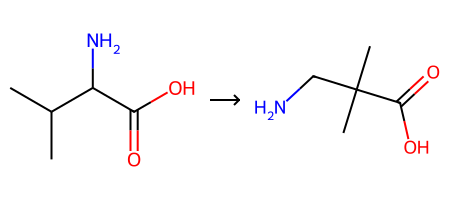

Analogue


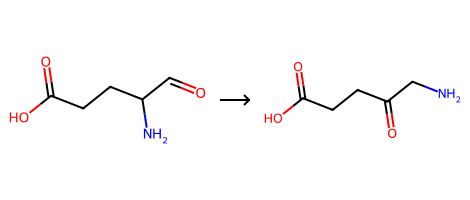

['rule0028', 'rule0028_47']
['rule0028_50']




In [3]:
# Problematic
problems = [
    # ('P019f0330406c83b4d12823f480e8f68c006ef345', -1),
    # ('P4d4cf75ccd62b55a0686f46d6e4b52d860725fe5', 1),
    # ('P5b5ed50f979c6bad62a65d71da88a84d4a259348', 0),
    # ('P77b28de7590b39ebcf60a7a4f4bdde47767f2ae7', 1),
    # ('Pef934dc8b4ba9f348f2d530a575a4467c056459f', 1), # Might be real, but not a good analogue
    # ('P2eb5a964bdc1db846cd9496f22d0eda68941ab3d', -1),
    ('P105ebcd3f73ba8e8128c306b562a8f7b767f82ac', 0)
]

for pid, step in problems:
    show_problem(pid, step)
    print('\n')

In [4]:
path = pw.get_path_with_id('P7362925724eaa940bf60614682e6db4d9579cbf9')
for pr in path.reactions:
    print(pr.image)
    print(pr.top_analogues(k=2)[0].image)

../artifacts/imgs/rxns/R27fbfe38615dcc7ddaf2ce01b5ad9ee2f9bdd9270123b457204c79969510f20d.svg
../artifacts/imgs/rxns/14187.svg
../artifacts/imgs/rxns/R050ea8de0b98efbab1c9fc15536f40f11fd57f28e3de0a5a9a69ca6c13e8973b.svg
../artifacts/imgs/rxns/3726.svg
